In [47]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [48]:
def parser(x):
    return datetime.strptime('19'+x, '%Y-%m')

In [50]:
series = read_csv('C:\\Users\\rajka\\Downloads\\codes\\sales.csv',header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())

months
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


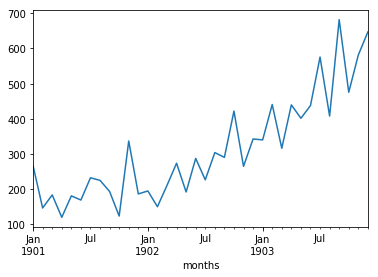

In [51]:
series.plot()
pyplot.show()

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sat, 31 Mar 2018   AIC                            406.340
Time:                                                 19:00:44   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

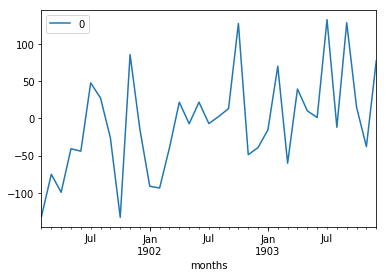

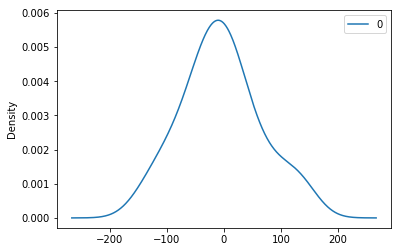

                0
count   35.000000
mean    -5.495153
std     68.132886
min   -133.296547
25%    -42.477836
50%     -7.186505
75%     24.748407
max    133.238036


In [55]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=349.117703, expected=342.300000
predicted=306.512934, expected=339.700000
predicted=387.376422, expected=440.400000
predicted=348.154173, expected=315.900000
predicted=386.308838, expected=439.300000
predicted=356.082032, expected=401.300000
predicted=446.379499, expected=437.400000
predicted=394.737297, expected=575.500000
predicted=434.915467, expected=407.600000
predicted=507.923400, expected=682.000000
predicted=435.482971, expected=475.300000
predicted=652.743749, expected=581.300000
predicted=546.343580, expected=646.900000
Test MSE: 6958.323


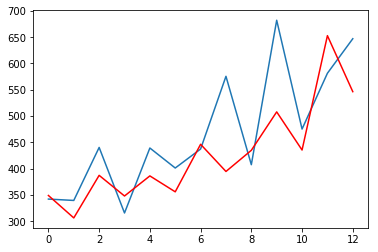

In [59]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()